In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load Cleaned Data

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

/opt/anaconda3/envs/tf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,original text,cleaned text,joke
0,0,I am soooo glad I'm not circumcised! My corona...,soooo glad circumcised corona covered foreskin...,1.0
1,1,Did you know Google now has a platform for rec...,know google platform recording bowel movements...,1.0
2,2,What is the difference between my wife and my ...,difference wife vacuum vacuum nt snore sex amp...,1.0
3,3,What did the French man say to the attractive ...,french man say attractive teletubby oo lala,1.0
4,4,"Yo Mama Yo momma's so fat, that when she went ...",yo mama yo momma fat went zoo hippos got jealous,1.0


In [3]:
df = df.drop(columns=df.columns.values[0:2])

In [4]:
df = df.dropna()

In [5]:
df_jokes = df[df['joke'] > 0]
df_non_jokes = df[df['joke'] < 0]

In [6]:
df = pd.concat([df_jokes.sample(25000, random_state=42),
                df_non_jokes.sample(25000, random_state=42)])
df.head()

,cleaned text,joke
544835,walked bar saw fat bird dancing table went sai...,1.0
120452,band antivaxxers refuse listen cure,1.0
100104,call building got engaged premrs,1.0
501226,shit gross one best friend dad used tell us me...,1.0
752947,hear couple stole calendar got six months,1.0


In [7]:
X = df.loc[:, 'cleaned text']
y = df.loc[:, 'joke']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

# TFIDF

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))

In [10]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Chi2 - Dimensionality Reduction 

In [11]:
chi_200 = SelectKBest(chi2, k=200)
chi_500 = SelectKBest(chi2, k=500)

In [12]:
X_train_tfidf_200_chi = chi_200.fit_transform(X_train_tfidf, y_train)
X_train_tfidf_500_chi = chi_500.fit_transform(X_train_tfidf, y_train)

In [13]:
X_test_tfidf_200_chi = chi_200.transform(X_test_tfidf)
X_test_tfidf_500_chi = chi_500.transform(X_test_tfidf)

In [14]:
X_train_200 = X_train_tfidf_200_chi.toarray()
X_train_500 = X_train_tfidf_500_chi.toarray()

X_test_200 = X_test_tfidf_200_chi.toarray()
X_test_500 = X_test_tfidf_500_chi.toarray()

# Chi2 - 200 Dimensions

In [15]:
y_train = np.array([max(i, 0) for i in y_train.to_numpy()])

In [16]:
y_train

array([0., 0., 0., ..., 0., 1., 1.])

In [17]:
y_test = np.array([max(i, 0) for i in y_test.to_numpy()])

In [18]:
y_test

array([0., 1., 1., ..., 1., 1., 1.])

In [19]:
model_200 = Sequential([
    Dense(2048, activation='relu', input_shape=(200,)),
    Dense(1, activation='sigmoid')
    
])

In [20]:
model_200.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )

In [21]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [22]:
model_200.fit(X_train_200, y_train, 
          validation_data=(X_test_200,y_test),
          epochs=100,
         callbacks=[es]
         )

Epoch 1/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2625 - accuracy: 0.8863 - val_loss: 0.2306 - val_accuracy: 0.9079
Epoch 2/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2232 - accuracy: 0.9012 - val_loss: 0.2236 - val_accuracy: 0.9127
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2091 - accuracy: 0.9098 - val_loss: 0.2132 - val_accuracy: 0.9140
Epoch 4/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1956 - accuracy: 0.9159 - val_loss: 0.2272 - val_accuracy: 0.9119
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1855 - accuracy: 0.9189 - val_loss: 0.2041 - val_accuracy: 0.9177
Epoch 6/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1761 - accuracy: 0.9233 - val_loss: 0.2091 - val_accuracy: 0.9186
Epoch 7/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9251 - val_loss: 0.2157 - val_ac

# Chi2 - 500 Dimensions 

In [23]:
model_500 = Sequential([
    Dense(2048, activation='relu', input_shape=(500,)),
    Dense(1, activation='sigmoid')
    
])

model_500.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )

In [24]:
model_500.fit(X_train_500, y_train, 
              validation_data=(X_test_500,y_test),
              epochs=100,
              callbacks=[es]
         )

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2019 - accuracy: 0.9248 - val_loss: 0.1689 - val_accuracy: 0.9374
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1571 - accuracy: 0.9395 - val_loss: 0.1623 - val_accuracy: 0.9430
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1422 - accuracy: 0.9453 - val_loss: 0.1606 - val_accuracy: 0.9456
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1254 - accuracy: 0.9523 - val_loss: 0.1531 - val_accuracy: 0.9480
Epoch 5/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1110 - accuracy: 0.9587 - val_loss: 0.1521 - val_accuracy: 0.9500
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0985 - accuracy: 0.9641 - val_loss: 0.1559 - val_accuracy: 0.9486
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0894 - accuracy: 0.9676 - val_loss: 0.1539 - val_ac

# Evaluate Neural Networks

In [25]:
def evaluate_model(model, train, y_train, test, y_test):
    pred_train = np.round(model.predict(train))
    pred_test = np.round(model.predict(test))
    
    train_acc = accuracy_score(y_train, pred_train)
    train_f1 = f1_score(y_train, pred_train)
    train_precision = precision_score(y_train, pred_train)
    train_recall = recall_score(y_train, pred_train)
    
    test_acc = accuracy_score(y_test, pred_test)
    test_f1 = f1_score(y_test, pred_test)
    test_precision = precision_score(y_test, pred_test)
    test_recall = recall_score(y_test, pred_test)
    
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_train, pred_train)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Train: True Labels vs Predicted Labels")
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_test, pred_test)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Test: True Labels vs Predicted Labels")
    
    print("Train Accuracy:  %f" % (train_acc))
    print("Train F1-Score:  %f" %(train_f1))
    print("Train Precision: %f" %(train_precision))
    print("Train Recall:    %f" %(train_recall))
    print()
    print("Test Accuracy:   %f" % (test_acc))
    print("Test F1-Score:   %f" %(test_f1))
    print("Test Precision:  %f" %(test_precision))
    print("Test Recall:     %f" %(test_recall))
    
    metrics = {
        'train_accuracy': train_acc,
        'train_f1':train_f1,
        'train_precision':train_precision,
        'train_recall':train_recall,
        'test_accuracy':test_acc,
        'test_f1':test_f1,
        'test_precision':test_precision,
        'test_recall':test_recall,
    }
    return metrics
    

Train Accuracy:  0.936025
Train F1-Score:  0.937602
Train Precision: 0.914087
Train Recall:    0.962359

Test Accuracy:   0.912100
Test F1-Score:   0.917488
Test Precision:  0.867874
Test Recall:     0.973118


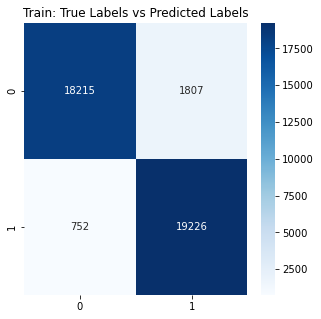

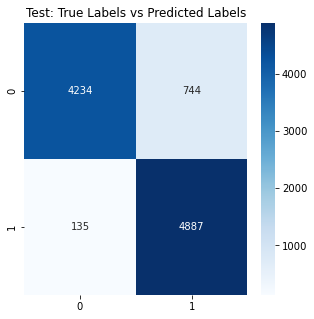

In [26]:
model_200_metrics = evaluate_model(model_200, 
                                   X_train_200, y_train, 
                                   X_test_200, y_test)

Train Accuracy:  0.980275
Train F1-Score:  0.980352
Train Precision: 0.975470
Train Recall:    0.985284

Test Accuracy:   0.945100
Test F1-Score:   0.946818
Test Precision:  0.921902
Test Recall:     0.973118


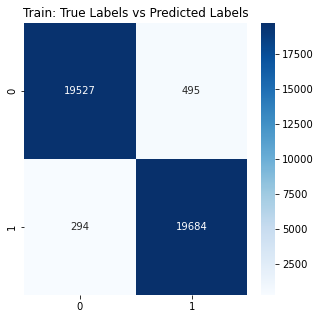

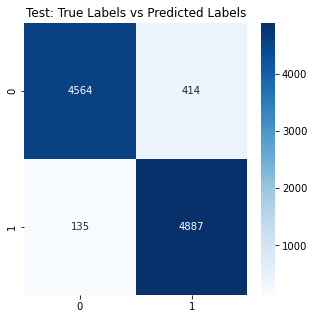

In [27]:
model_500_metrics = evaluate_model(model_500, 
                                   X_train_500, y_train,
                                   X_test_500, y_test)